<a href="https://colab.research.google.com/github/LailaDuffy/WoTech_Python/blob/main/WoTech_Python_Lesson23_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DATA EXTRACTION

In [1]:
import seaborn as sns
import pandas as pd

titanic_data = sns.load_dataset('titanic')

### DATA REVIEW

In [2]:
print("Number of passangers:",len(titanic_data))
titanic_data.columns
titanic_data.dtypes

titanic_data['class'].unique()

titanic_data.isnull().sum()

Number of passangers: 891


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### DATA TRANSFORMATION

In [3]:
titanic_data['deck'] = titanic_data['deck'].astype(str)
titanic_data['class'] = titanic_data['class'].astype(str)
titanic_data.fillna(0, inplace=True)
titanic_data.drop(['alive', 'alone', 'adult_male', 'deck'], axis=1, inplace=True)

titanic_data.isnull().sum()

titanic_data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 0], dtype=object)

In [4]:
# Mapping for embark_town
embark_town_mapping = {'Southampton': 1, 'Cherbourg': 2, 'Queenstown': 3, 0:0}
titanic_data['embark_town'] = titanic_data['embark_town'].map(embark_town_mapping)

# Mapping for sex
sex_mapping = {'male': 0, 'female': 1}
titanic_data['sex'] = titanic_data['sex'].map(sex_mapping)

# Mapping for embarked
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3, 0 : 0}
titanic_data['embarked'] = titanic_data['embarked'].map(embarked_mapping)

# Mapping for class
class_mapping = {'Third': 1, 'First': 2, 'Second': 3}
titanic_data['class'] = titanic_data['class'].map(class_mapping)

# Mapping for who
who_mapping = {'man': 1, 'woman': 2, 'child': 3}
titanic_data['who'] = titanic_data['who'].map(who_mapping)


In [5]:
titanic_data.isnull().sum() #NO MORE EMPTY VALUES

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


### TRAIN AND TEST SPLIT

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = titanic_data.drop('survived', axis=1) #Independent variables
y = titanic_data['survived'] #Dependent variable

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

### CREATE DATA MODEL

In [28]:
from sklearn.neighbors import KNeighborsClassifier # import the model

model = KNeighborsClassifier() # initialize the model

model.fit(X_train, y_train) # fit the model

prediction_knn = model.predict(X_test) # predict using model on test dataset, as model has not seen this dataset yet

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction_knn)

0.664804469273743

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction_knn)
print(cm)

[[85 33]
 [27 34]]


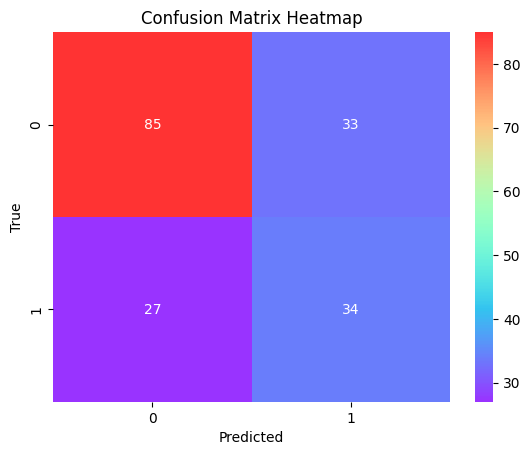

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize a heatmap using seaborn library

sns.heatmap(cm, annot=True, cmap='rainbow', alpha=0.8, fmt='g')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# TEAMWORK

## Look at what is Central Limit Theorem and try to prove/ visualize it using NumPy

In [33]:
import numpy as np
import matplotlib.pyplot as plt



### Simple Example, imagine rolling a die:

The result of rolling one die is uniformly distributed (all outcomes have equal chances).
If you roll the die, say, 10 times and average the results, the average will likely be closer to the true average (which is 3.5).
As you increase the number of rolls and calculate averages, these averages will start looking like a bell curve.

In [59]:
averages = []
for i in range(1000):
  rolls = np.random.randint(1, 7, 1000000)
  average = np.mean(rolls)
  averages.append(average)


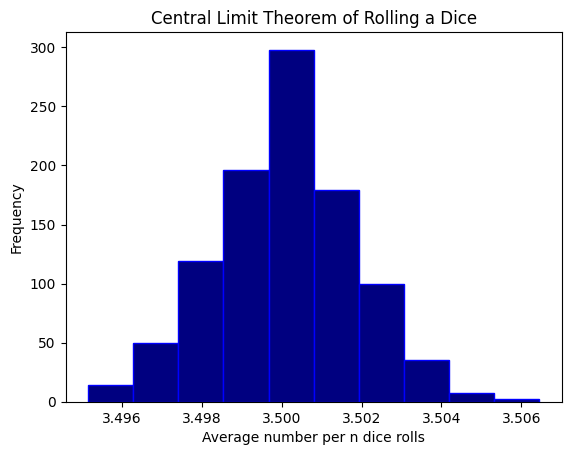

In [62]:
# vizulaize using np bell curve
plt.hist(averages, color='navy', edgecolor='b')
plt.title('Central Limit Theorem of Rolling a Dice')
plt.xlabel('Average number per n dice rolls')
plt.ylabel('Frequency')
plt.show()